In [1]:
# Deixando os plots interativos
%matplotlib widget

import xarray as xr
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [2]:
soundings = xr.open_dataset("../data/soundings/sondewnpn/maosondewnpnM1.b1.20140101.054700..20151201.052700.custom.cdf")

In [3]:
soundings

<xarray.Dataset>
Dimensions:      (time: 8188605)
Coordinates:
  * time         (time) datetime64[ns] 2014-01-01T05:47:00 ... 2015-12-01T06:...
Data variables: (12/25)
    base_time    datetime64[ns] ...
    time_offset  (time) datetime64[ns] ...
    qc_time      (time) int32 ...
    pres         (time) float32 ...
    qc_pres      (time) int32 ...
    tdry         (time) float32 ...
    ...           ...
    wstat        (time) float32 ...
    asc          (time) float32 ...
    qc_asc       (time) int32 ...
    lat          (time) float32 ...
    lon          (time) float32 ...
    alt          (time) float32 ...
Attributes: (12/46)
    command_line:               sonde_ingest -s mao -f M1 -R -d
    process_version:            ingest-sonde-10.11-0.el5
    ingest_software:            ingest-sonde-10.11-0.el5
    dod_version:                sondewnpn-b1-2.0
    site_id:                    mao
    facility_id:                M1: Manacapuru, Amazonia, Brazil
    ...                         ...
    zeb_platform:               maosondewnpnM1.b1
    history:                    Thu Feb 23 23:29:43 2023: /usr/bin/ncrcat -o ...
    NCO:                        netCDF Operators version 4.7.5 (Homepage = ht...
    nco_openmp_thread_number:   1
    nco_input_file_number:      2905
    nco_input_file_list:        /var/ftp/user_order/lopesc1/.237996_extracted...

In [30]:
sdf = soundings.to_dataframe()

In [31]:
sdf.alt = sdf.alt / 1000
sdf.alt = sdf.alt.round(0)
sdf.base_time = sdf.time_offset.apply(lambda x: x.value)
# sdf.tdry = sdf.tdry.round(0)

In [6]:
sdf.columns

Index(['base_time', 'time_offset', 'qc_time', 'pres', 'qc_pres', 'tdry',
       'qc_tdry', 'dp', 'qc_dp', 'wspd', 'qc_wspd', 'deg', 'qc_deg', 'rh',
       'qc_rh', 'u_wind', 'qc_u_wind', 'v_wind', 'qc_v_wind', 'wstat', 'asc',
       'qc_asc', 'lat', 'lon', 'alt'],
      dtype='object')

<AxesSubplot:xlabel='base_time', ylabel='alt'>

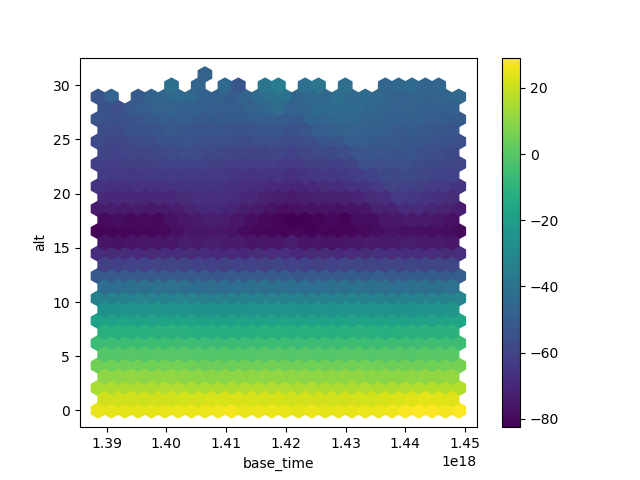

In [27]:
sdf.plot.hexbin(x="base_time", y="alt", C="tdry", gridsize=27, cmap="viridis")

In [32]:
sdf.groupby("alt").tdry.mean()

alt
0.0     26.049133
1.0     21.907558
2.0     15.624873
3.0     10.208019
4.0      4.867666
5.0     -0.509335
6.0     -5.905480
7.0    -11.723661
8.0    -18.108591
9.0    -25.235451
10.0   -32.908504
11.0   -41.028625
12.0   -49.391075
13.0   -57.741268
14.0   -65.717278
15.0   -72.793770
16.0   -78.046967
17.0   -79.904335
18.0   -76.870193
19.0   -72.603958
20.0   -68.800156
21.0   -65.840492
22.0   -63.114670
23.0   -60.316971
24.0   -57.717926
25.0   -55.150887
26.0   -52.729897
27.0   -50.357487
28.0   -48.174107
29.0   -46.412075
30.0   -46.143082
31.0   -47.427746
Name: tdry, dtype: float32

In [24]:
sdf.tdry.max()

40.0

In [26]:
135/5

27.0